In [1]:
import tensorflow as tf
import keras
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
img_rows, img_cols = 102, 136 
data_path = './dataset/'
x, y = [], []
counter = 0; 
classes = os.listdir(data_path)

print(classes)

['Boot', 'Sandal', 'Shoe']


In [3]:
for class_path in os.listdir(data_path):
  for img_path in os.listdir(f"{data_path}{class_path}"):
    path = f"{data_path}{class_path}/{img_path}"
    label = counter 
    image = tf.keras.preprocessing.image.load_img(path, target_size=(img_rows, img_cols))
    image = tf.keras.preprocessing.image.img_to_array(image)
    x.append(image)
    y.append(label)
  counter += 1 

x = np.array(x)
y = np.array(y)

x = x.astype('float32') /255.0 

# 80:10:10 
xtrain, xtemp, ytrain, ytemp = train_test_split(x, y, test_size=0.2, random_state=42)
xval, xtest, yval, ytest = train_test_split(xtemp, ytemp, test_size=0.5, random_state=42) 

ytrain = keras.utils.to_categorical(ytrain, num_classes=3)
ytest = keras.utils.to_categorical(ytest, num_classes=3)
yval = keras.utils.to_categorical(yval, num_classes=3)

print(xtrain.shape)

(12000, 102, 136, 3)


In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(6, (5, 5), activation='relu', input_shape=(img_rows, img_cols, 3)))
model.add(keras.layers.MaxPooling2D((2, 2), strides=2))
model.add(keras.layers.Conv2D(16, (5, 5), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2), strides=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(120, activation='relu'))
model.add(keras.layers.Dense(84, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))
model.summary()

c:\Anaconda3\envs\deep_learning\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 132, 6)     │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 66, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 45, 62, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 22, 31, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10912)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │     1,309,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           255 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,322,851 (5.05 MB)

 Trainable params: 1,322,851 (5.05 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['Accuracy'])
hist = model.fit(xtrain, ytrain, batch_size=120, validation_data=(xval, yval), epochs=10)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - Accuracy: 0.7040 - loss: 0.6563 - val_Accuracy: 0.9187 - val_loss: 0.2247
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - Accuracy: 0.9409 - loss: 0.1716 - val_Accuracy: 0.9280 - val_loss: 0.1874
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - Accuracy: 0.9608 - loss: 0.1164 - val_Accuracy: 0.9413 - val_loss: 0.1533
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - Accuracy: 0.9685 - loss: 0.0887 - val_Accuracy: 0.9613 - val_loss: 0.1145
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - Accuracy: 0.9807 - loss: 0.0523 - val_Accuracy: 0.9593 - val_loss: 0.1068
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - Accuracy: 0.9900 - loss: 0.0322 - val_Accuracy: 0.9647 - val_loss: 0.1090
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - Accuracy: 0.9919 - loss: 0.0243 - val_Accuracy: 0.9607 - val_loss: 0.1400
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - Accuracy: 0.9950 - loss: 0.0163 - val_Accu

In [6]:
score = model.evaluate(xtest, ytest)
print(f"Test loss: {score[0]}")
print(f"Test accuracy: {score[1]}") 

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - Accuracy: 0.9718 - loss: 0.1532
Test loss: 0.13033480942249298
Test accuracy: 0.9713333249092102


47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


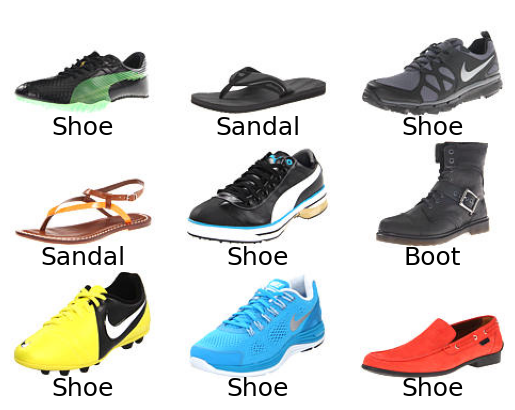

In [8]:
predictions = model.predict(xtest)
predicted_labels = np.argmax(predictions, axis = 1)

for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(xtest[i], cmap='gray')
  plt.axis('off')
  plt.text(0.5, -0.15, classes[predicted_labels[i]], fontsize=18, ha='center', transform=plt.gca().transAxes)


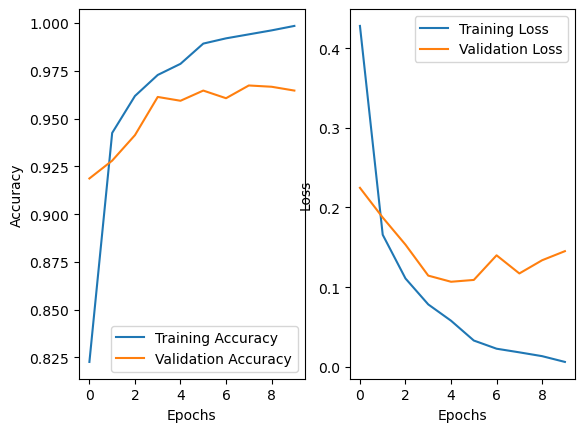

In [9]:
plt.subplot(1, 2, 1)
plt.plot(hist.history['Accuracy'], label='Training Accuracy')
plt.plot(hist.history['val_Accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()